In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Practice - Python, ML/Churn_Modelling.csv")
df           

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9966 non-null   object 
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


In [5]:
print(df.isnull().sum()) #35.42

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender             54
Age                34
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64


In [6]:
updated_df = df.dropna(axis=0)
# axis = 0 the 'na' rows will be deleted
# axis = 1 the 'na' columns will be deleted

In [7]:
updated_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 9916 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9916 non-null   int64  
 1   CustomerId       9916 non-null   int64  
 2   Surname          9916 non-null   object 
 3   CreditScore      9916 non-null   int64  
 4   Geography        9916 non-null   object 
 5   Gender           9916 non-null   object 
 6   Age              9916 non-null   object 
 7   Tenure           9916 non-null   int64  
 8   Balance          9916 non-null   float64
 9   NumOfProducts    9916 non-null   int64  
 10  HasCrCard        9916 non-null   int64  
 11  IsActiveMember   9916 non-null   int64  
 12  EstimatedSalary  9916 non-null   float64
 13  Exited           9916 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


In [8]:
# Filling the missing values 
df['Age'] =  pd.to_numeric(df['Age'], errors='coerce').astype('Int64')
df['Age'].mean()
df['Age'].median()

37.0

In [9]:
#fill na - Filling the  null values
updated_df1 = df
updated_df1['Age'] =  updated_df1['Age'].fillna(df['Age'].median())    
updated_df1
# less outliers - better to use the mean
# More Outliers  - better to use the median

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
updated_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              10000 non-null  Int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: Int64(1), float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [11]:
df1 = df
 # Backward Fill
df1['Age'] = df1['Age'].bfill()
# Forward Fill
df1['Age'] = df1['Age'].ffill()


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              10000 non-null  Int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: Int64(1), float64(2), int64(8), object(3)
memory usage: 1.1+ MB


# Feature  Scaling
 We have to scale the data in a single scale. It will help standardize the dataset in one range.
 The feature scaling is important, We have two methods for this
 - Standardization : Z score
 - Normalization :  Normalization - Min Max Scaler  - Taking the values from here to convert the vales from 0 to  1.

In [14]:
!pip install -U scikit-learn

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.9143,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.466093,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.0,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.0,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.0,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.0,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.0,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Task 1 - Normalization

In [19]:
new_df = pd.DataFrame(df,columns=['Age','Tenure'])

In [20]:
new_df.head()

,Age,Tenure
0,42,2
1,41,1
2,42,8
3,39,1
4,43,2


In [21]:
new_df['Age'] =  pd.to_numeric(new_df['Age'], errors='coerce').astype('float64')
# 

In [22]:
new_df['Age'] = new_df['Age'].fillna(new_df['Age'].mean())

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     10000 non-null  float64
 1   Tenure  10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [24]:
scaler = MinMaxScaler() # Instantiating the MinMaxScaler() Function
normalized_df = scaler.fit_transform(new_df)
print(normalized_df)

[[0.32432432 0.2       ]
 [0.31081081 0.1       ]
 [0.32432432 0.8       ]
 ...
 [0.24324324 0.7       ]
 [0.32432432 0.3       ]
 [0.13513514 0.4       ]]


# Standardization

In [26]:
scaler = StandardScaler() # Instantiating the StandardScaler() Function
standardized_df = scaler.fit_transform(new_df)
print(standardized_df)

[[ 0.29484299 -1.04175968]
 [ 0.19929158 -1.38753759]
 [ 0.29484299  1.03290776]
 ...
 [-0.27846548  0.68712986]
 [ 0.29484299 -0.69598177]
 [-1.04287679 -0.35020386]]


In [27]:
data = pd.read_csv("Practice - Python, ML/raw_sales.csv")
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [28]:
type(data)

pandas.core.frame.DataFrame

In [29]:
import statistics
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [30]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [31]:
list1 = find_anomalies(data['price'])

In [32]:
len(list1)

461

In [33]:
data.price.skew()

4.312009366902366

In [34]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Density'>

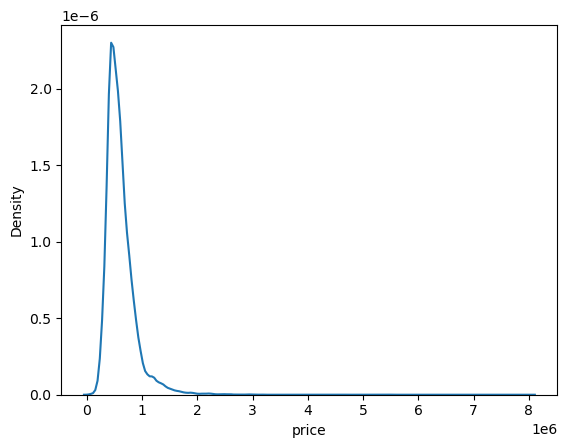

In [35]:
sns.kdeplot(data.price)

In [36]:
# Log Transformation 
data['price_transformed'] = np.log(data.price)

In [37]:
 data.price_transformed.skew()

0.4731646269984763

In [38]:
list_2 = find_anomalies(data.price_transformed)


In [39]:
len(list_2)

266

<Axes: xlabel='price_transformed', ylabel='Density'>

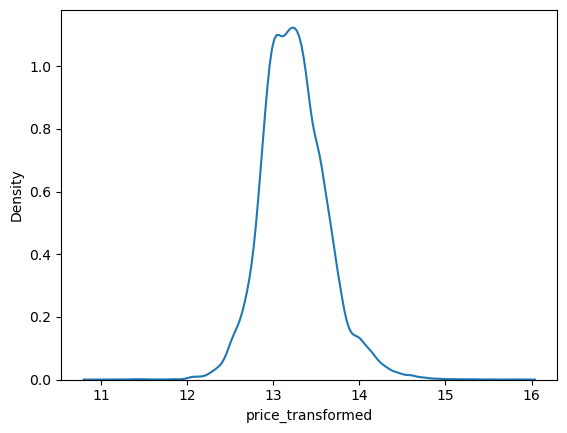

In [40]:
sns.kdeplot(data.price_transformed)

<Axes: >

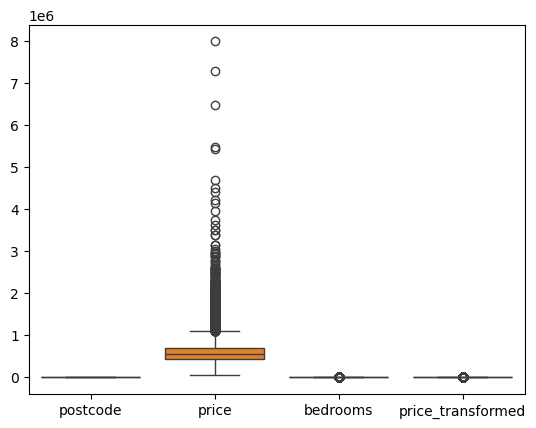

In [41]:
# Box Plots
sns.boxplot(data=data)

In [42]:
data.describe()

,postcode,price,bedrooms,price_transformed
count,29580.000000,2.958000e+04,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695
std,146.717292,2.817079e+05,0.951275,0.375214
min,2600.000000,5.650000e+04,0.000000,10.941996
25%,2607.000000,4.400000e+05,3.000000,12.994530
50%,2615.000000,5.500000e+05,3.000000,13.217674
75%,2905.000000,7.050000e+05,4.000000,13.465953
max,2914.000000,8.000000e+06,5.000000,15.894952


# Handle Invalid Values
- Encode Unicode Properly (Date column was not having logical value. Incase data is reading null characters
- Convert incorrect data type
- Corrrect vakues that go beyond range
- Correct Wrong structured

In [44]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [45]:
tele_base_data = pd.read_csv('Practice - Python, ML/Churn_Modelling.csv')

In [46]:
tele_base_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### UNIVARIATE ANALYSIS

In [48]:
tele_new = tele_base_data[['Geography','Gender','Exited']]

In [49]:
tele_new.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [50]:
tele_new.Exited.value_counts()/len(tele_new) * 100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

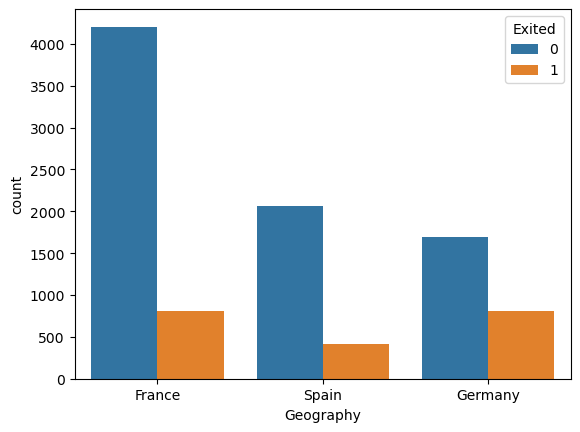

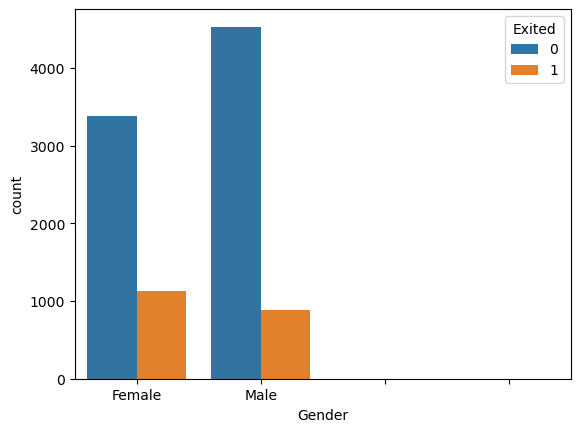

In [51]:
#COUNTPLOT - shows counts of categorical bins using seaborn
for i, predictor in enumerate(tele_new.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=tele_new, x = predictor, hue = 'Exited')


The insights that we got is :
- Female are the more churners compared to Males.
- People staying in Germany are more Churners.

### BIVARIATE ANALYSIS

##### SEABORN HISTPLOT - Plot univariate or bivariate histograms to show distributions of data


<Axes: xlabel='Gender', ylabel='Count'>

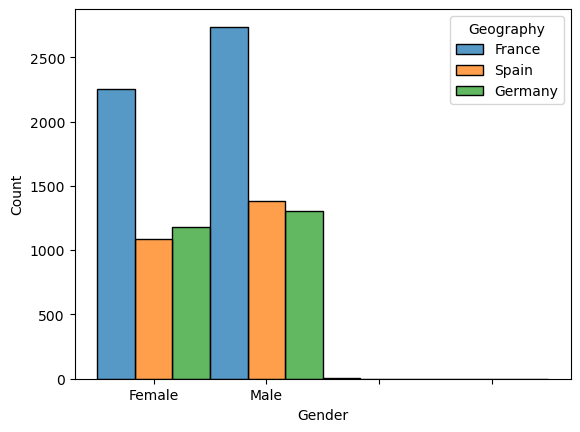

In [55]:
sns.histplot(x="Gender", hue = "Geography", data = tele_new, stat = "count", multiple="dodge")

In [56]:
# creating a new dataframe for churned customers

telco_new_target1 = tele_new.loc[tele_new["Exited"]==1]

<Axes: xlabel='Gender', ylabel='Count'>

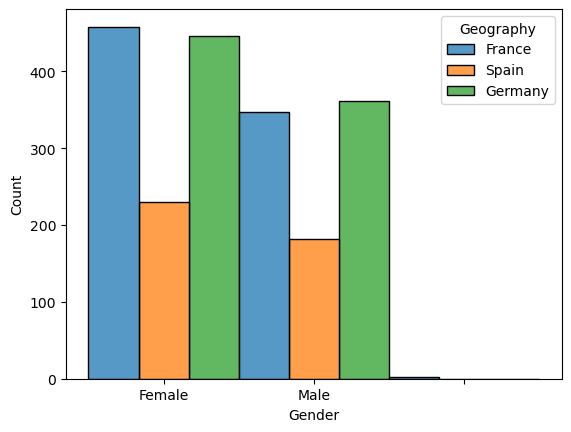

In [57]:
sns.histplot(x="Gender", hue = "Geography", data = telco_new_target1, stat = "count", multiple="dodge")

From these two graphs we can analyse:
- In Germany : ~36% of Females Churn
- In Germany : ~29% of Males Churn

### NUMERICAL ANALYSIS

##### Correlation : It Ranges from -1 to +1 
- +1 - Postive Correlation
- -1 - Negative Correlation
- 0 - No Correlation

In [61]:
numerical_telec_data = tele_base_data.select_dtypes(include=['number','object'])

In [90]:
numerical_telec_data = numerical_telec_data.drop('Surname',axis=1)
numerical_telec_data = numerical_telec_data.drop('Geography',axis=1)
numerical_telec_data = numerical_telec_data.drop('Gender',axis=1)

In [63]:
numerical_telec_data['Age'] =  pd.to_numeric(numerical_telec_data['Age'], errors='coerce').astype('float64')

In [92]:
numerical_telec_data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000821,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.008853,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003842,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000821,0.008853,-0.003842,1.000000,-0.009623,0.028279,-0.031163,-0.012048,0.084975,-0.007329,0.285371
Tenure,-0.006495,-0.014883,0.000842,-0.009623,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028279,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.031163,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.012048,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.084975,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007329,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

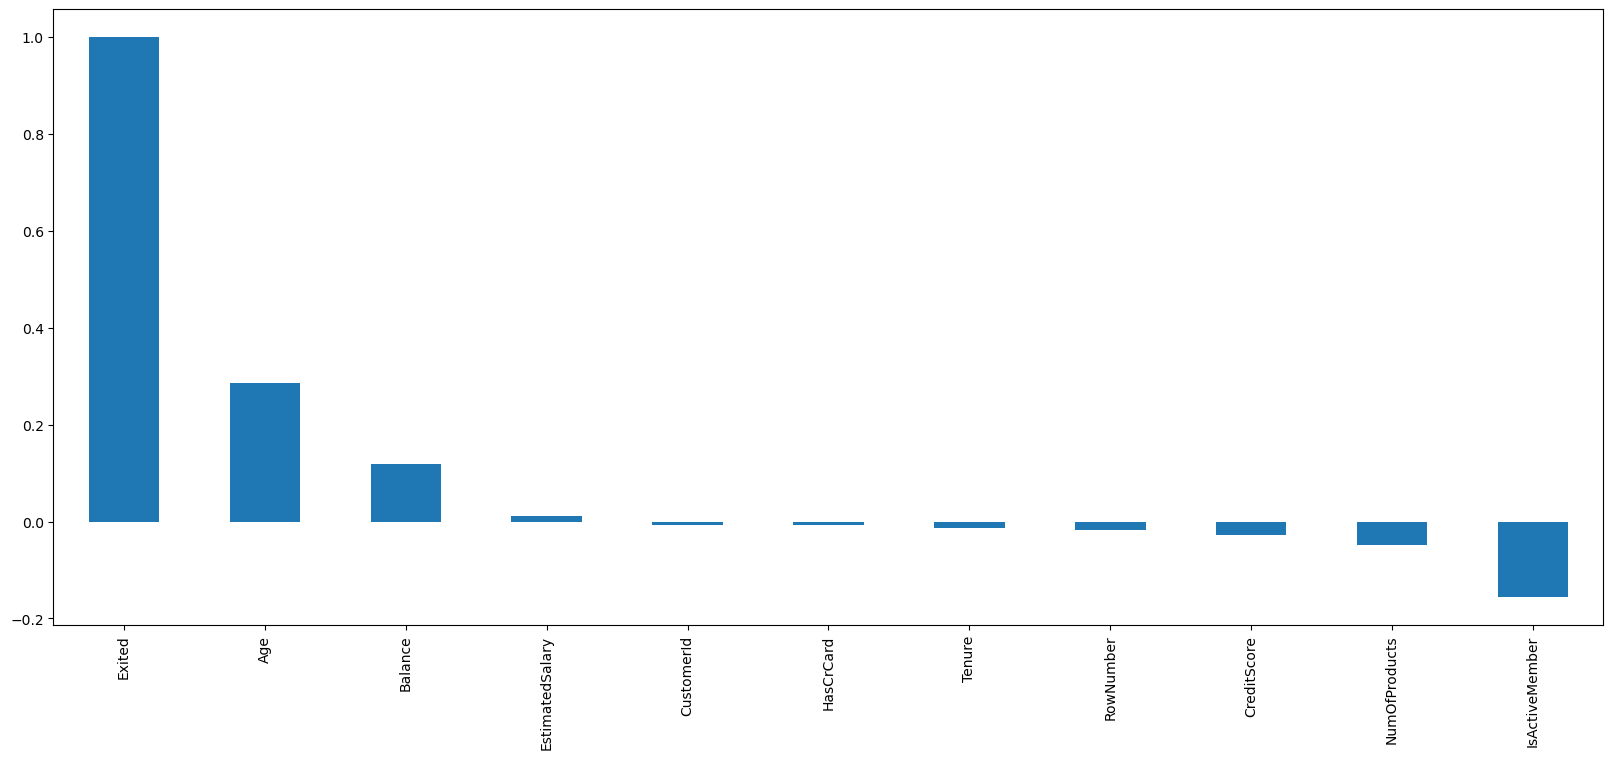

In [94]:
plt.figure(figsize=(20,8))
numerical_telec_data.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

In [96]:
numerical_telec_data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000821,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.008853,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003842,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000821,0.008853,-0.003842,1.000000,-0.009623,0.028279,-0.031163,-0.012048,0.084975,-0.007329,0.285371
Tenure,-0.006495,-0.014883,0.000842,-0.009623,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028279,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.031163,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.012048,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.084975,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007329,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


##### HEATMAP - Plot the rectangular data as the color encoded matrix

<Axes: >

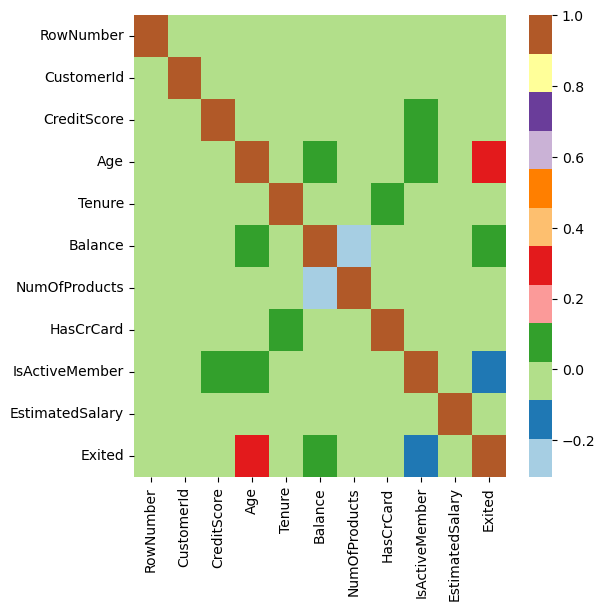

In [98]:

plt.figure(figsize=(6,6))
sns.heatmap(numerical_telec_data.corr(), cmap='Paired')

In [100]:
numerical_telec_data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43.0,2,125510.82,1,1,1,79084.10,0


- Plotting Age in a Barchar looks clumpsy
- The better way of visualizing the age column is either line chart or the age bins

<Axes: xlabel='Age'>

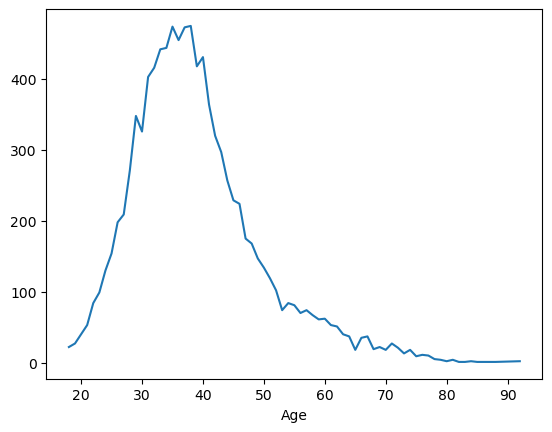

In [102]:
numerical_telec_data['Age'].value_counts().sort_index(ascending=True).plot()

In [104]:
numerical_telec_data_1 = numerical_telec_data[numerical_telec_data['Exited']==1]

In [106]:
numerical_telec_data_1.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42.0,2,0.00,1,1,1,101348.88,1
2,3,15619304,502,42.0,8,159660.80,3,1,0,113931.57,1
5,6,15574012,645,44.0,8,113755.78,2,1,0,149756.71,1
7,8,15656148,376,29.0,4,115046.74,4,1,0,119346.88,1
16,17,15737452,653,58.0,1,132602.88,1,1,0,5097.67,1


<Axes: xlabel='Age'>

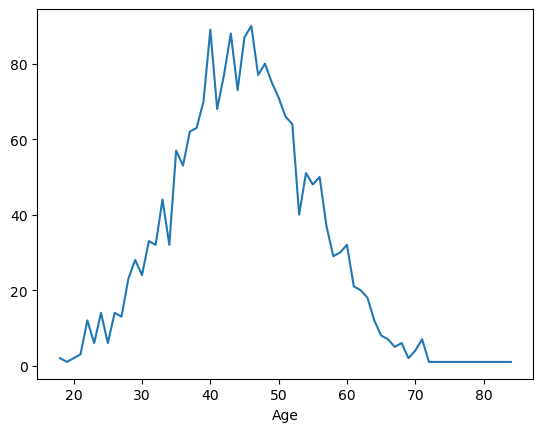

In [108]:
numerical_telec_data_1['Age'].value_counts().sort_index(ascending=True).plot()

Insights from this Data:
- In the churned data most of the people are around 40-55 age.
- But in original data most of the people are around 28-48 age.
- Age is an important factor in churning customers prediction.

##### KDE PLOT - A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

C:\Users\yoges\AppData\Local\Temp\ipykernel_16448\2646249603.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(numerical_telec_data.Age[(numerical_telec_data['Exited']==0)], color = "Red", shade = True)
C:\Users\yoges\AppData\Local\Temp\ipykernel_16448\2646249603.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(numerical_telec_data.Age[(numerical_telec_data['Exited']==1)], color = "Blue", shade = True)


Text(0.5, 1.0, 'Age by Churn')

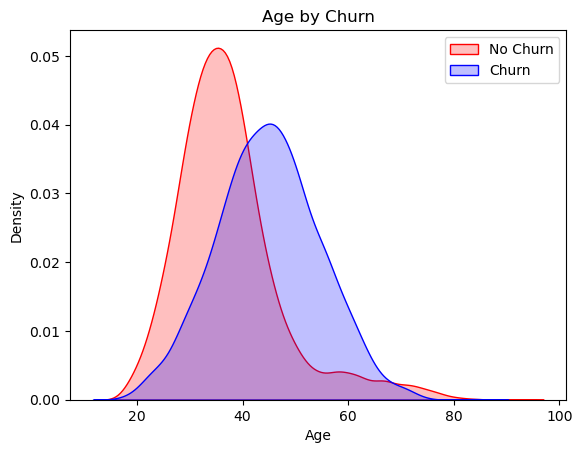

In [110]:
Tot = sns.kdeplot(numerical_telec_data.Age[(numerical_telec_data['Exited']==0)], color = "Red", shade = True)
Tot = sns.kdeplot(numerical_telec_data.Age[(numerical_telec_data['Exited']==1)], color = "Blue", shade = True)
Tot.legend(["No Churn", "Churn"], loc = 'upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by Churn')

Insights:
- People who are not churning are the age of 28 - 45
- People who are churning are the age of 45 - 55

C:\Users\yoges\AppData\Local\Temp\ipykernel_16448\55933388.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(numerical_telec_data.Tenure[(numerical_telec_data['Exited']==0)], color = "Red", shade = True)
C:\Users\yoges\AppData\Local\Temp\ipykernel_16448\55933388.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(numerical_telec_data.Tenure[(numerical_telec_data['Exited']==1)], color = "Blue", shade = True)


Text(0.5, 1.0, 'Tenure by Churn')

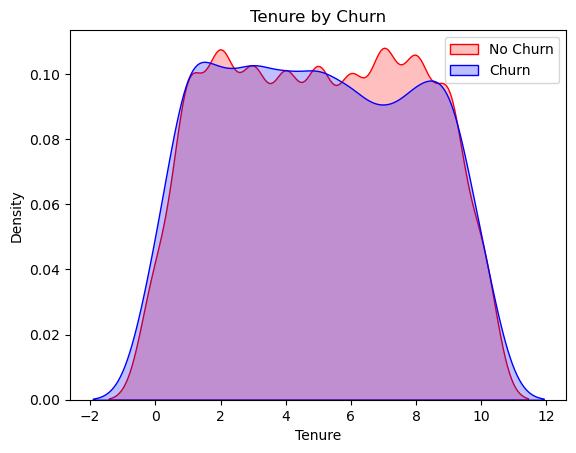

In [112]:
Tot = sns.kdeplot(numerical_telec_data.Tenure[(numerical_telec_data['Exited']==0)], color = "Red", shade = True)
Tot = sns.kdeplot(numerical_telec_data.Tenure[(numerical_telec_data['Exited']==1)], color = "Blue", shade = True)
Tot.legend(["No Churn", "Churn"], loc = 'upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Tenure')
Tot.set_title('Tenure by Churn')

I dont see a huge impact with respect to 'Tenure'

C:\Users\yoges\AppData\Local\Temp\ipykernel_16448\2700842750.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(numerical_telec_data.Balance[(numerical_telec_data['Exited']==0)], color = "Red", shade = True)
C:\Users\yoges\AppData\Local\Temp\ipykernel_16448\2700842750.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(numerical_telec_data.Balance[(numerical_telec_data['Exited']==1)], color = "Blue", shade = True)


Text(0.5, 1.0, 'Balance by Churn')

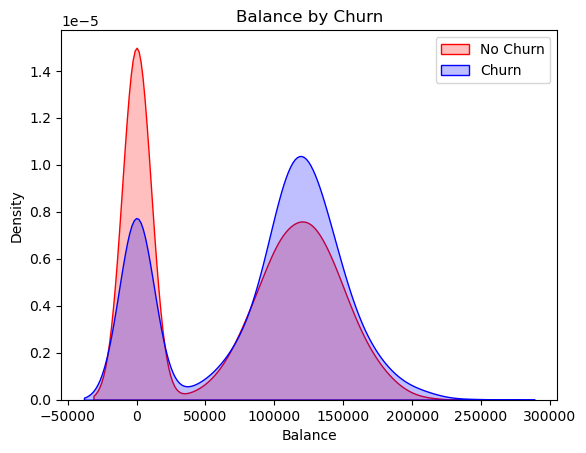

In [114]:
Tot = sns.kdeplot(numerical_telec_data.Balance[(numerical_telec_data['Exited']==0)], color = "Red", shade = True)
Tot = sns.kdeplot(numerical_telec_data.Balance[(numerical_telec_data['Exited']==1)], color = "Blue", shade = True)
Tot.legend(["No Churn", "Churn"], loc = 'upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title('Balance by Churn')


- In smaller Balance the people who are churn is less and in larger balance it's vice versa

### FEATURE BINNING

In [116]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [118]:
df = pd.read_csv("Practice - Python, ML/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9966 non-null   object 
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


In [218]:
df['Age'] =  pd.to_numeric(df['Age'], errors='coerce').astype('Float64')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [124]:
df.drop(columns = ['CustomerId', 'RowNumber', 'Surname'], axis = 1, inplace= True)

In [126]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [128]:
df.Age.min()

18.0

In [130]:
df.Age.max()

92.0

In [132]:
labels = ['0-20', '21-40', '41-60', 'Above 61']
bins = [0, 20, 40, 60, 100]

df['Age_bins'] = pd.cut(df.Age, bins, labels = labels, include_lowest=True)

In [134]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,41-60


In [136]:
df[['Age', 'Age_bins']].to_csv("test.csv")

In [138]:
df.Age_bins.value_counts()

Age_bins
21-40       6303
41-60       3109
Above 61     462
0-20          89
Name: count, dtype: int64

NameError: name 'add_labels' is not defined

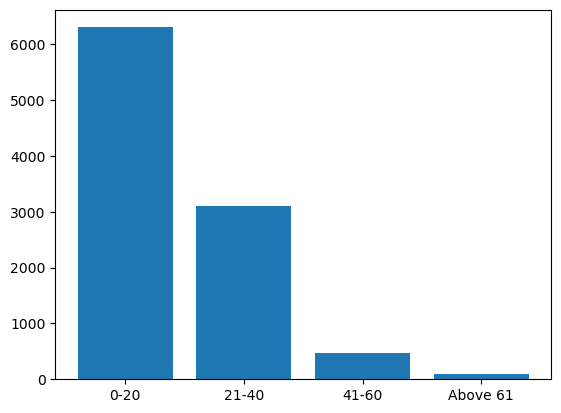

In [140]:
# making the bar chart on the data
plt.bar(labels, df.Age_bins.value_counts())
add_labels(labels, df.Age_bins.value_counts()) # we can see labels on top of the graph
plt.title('Age Count')
plt.xlabel('Age Bins')
plt.ylabel('Age Count')
# labels - x axis
# counts - y axis

In [142]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i]) 

### FEATURE ENCODING

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [206]:
df = pd.read_csv('Practice - Python, ML/Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9966 non-null   object 
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


In [208]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [210]:
df.drop(columns= ["CustomerId", "RowNumber", "Surname"], axis = 1, inplace = True)

In [214]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [216]:
df.Gender.value_counts()

Gender
Male      5424
Female    4517
             4
             1
Name: count, dtype: int64

#### Handling Missing Values in Gender


In [177]:
df.Gender.mode()

0    Male
Name: Gender, dtype: object

In [179]:
df['Gender'] = df['Gender'].fillna('Male')

In [181]:
df.Gender.value_counts()

Gender
Male      5478
Female    4517
             4
             1
Name: count, dtype: int64

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           9946 non-null   object 
 3   Age              9963 non-null   Float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: Float64(1), float64(2), int64(6), object(2)
memory usage: 869.3+ KB


### LABEL ENCODING

In [186]:
le = preprocessing.LabelEncoder()
df['Gender_label'] = le.fit_transform(df.Gender.values)

In [188]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_label
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2


In [190]:
df.Gender_label.value_counts()

Gender_label
3    5478
2    4517
0       4
1       1
Name: count, dtype: int64

In [192]:
df.Gender.value_counts()

Gender
Male      5478
Female    4517
             4
             1
Name: count, dtype: int64

### One Hot Encoding

pandas - getdummies or onehot encoder in sklearn

In [222]:
one_hot = pd.get_dummies(df['Geography'])

In [224]:
one_hot

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [226]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [228]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_,Gender_,Gender_Female,Gender_Male
0,619,42.0,2,0.00,1,1,1,101348.88,1,True,False,False,False,False,True,False
1,608,41.0,1,83807.86,1,0,1,112542.58,0,False,False,True,False,False,True,False
2,502,42.0,8,159660.80,3,1,0,113931.57,1,True,False,False,False,False,True,False
3,699,39.0,1,0.00,2,0,0,93826.63,0,True,False,False,False,False,True,False
4,850,43.0,2,125510.82,1,1,1,79084.10,0,False,False,True,False,False,True,False


### Dummy Encoding

In [231]:
df_dummies_de = pd.get_dummies(df, drop_first=True)
df_dummies_de.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_,Gender_Female,Gender_Male
0,619,42.0,2,0.00,1,1,1,101348.88,1,False,False,False,True,False
1,608,41.0,1,83807.86,1,0,1,112542.58,0,False,True,False,True,False
2,502,42.0,8,159660.80,3,1,0,113931.57,1,False,False,False,True,False
3,699,39.0,1,0.00,2,0,0,93826.63,0,False,False,False,True,False
4,850,43.0,2,125510.82,1,1,1,79084.10,0,False,True,False,True,False


### Target Encoding

In [234]:
!pip install category_encoders

   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   ------------------- -------------------- 41.0/82.0 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 82.0/82.0 kB 658.4 kB/s eta 0:00:00


In [236]:
from category_encoders import TargetEncoder

In [240]:
encoder = TargetEncoder()
df1 = pd.read_csv('Practice - Python, ML/Churn_Modelling.csv')
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [242]:
df1['Gender'] = df1['Gender'].fillna('Male')

In [244]:
df1.Gender.value_counts()

Gender
Male      5478
Female    4517
             4
             1
Name: count, dtype: int64

In [246]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9966 non-null   object 
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


In [248]:
df1['Age'] =  pd.to_numeric(df1['Age'], errors='coerce').astype('Float64')

In [250]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9963 non-null   Float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: Float64(1), float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [254]:
encoder = TargetEncoder()
# Mathematical values created based on Gender and Target columns
df1['Gender Encoded'] = encoder.fit_transform(df1['Gender'], df1['Exited'])
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender Encoded
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,0.251052
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,0.251052
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,0.251052
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,0.251052
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0.251052


In [256]:
df1['Gender Encoded'].value_counts()

Gender Encoded
0.164476    5478
0.251052    4517
0.253473       4
0.177197       1
Name: count, dtype: int64

#### Benefits of Target Encoder:
- Target encoding is a simple and quick encoding method that doesn't add to the dimensionality of the dataset. Therefore it may be used as a good first try technique.

#### Limitations of Target Encoding:
- It is dependent on the target distribution which means target encoding requires careful validation as it can be prone to overfitting. 

### HASH ENCODING

In [264]:
from category_encoders import HashingEncoder

In [266]:
X = df.Gender

In [268]:
y = df.Exited

In [272]:
ce_hash = HashingEncoder(cols=['Gender'])
ce_hash.fit_transform(X,y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,1,0,0
9996,0,0,0,0,0,1,0,0
9997,0,0,0,0,0,0,0,1
9998,0,0,0,0,0,1,0,0


In [274]:
X1 = df.Geography

In [280]:
ce_hash1 = HashingEncoder(n_components=16, cols=['Geography'])
ce_hash1.fit_transform(X1,y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
